# Importaciones

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from scipy.stats import shapiro
import category_encoders as ce

# Lectura dataset y mapeo de la clase objetivo PROMOCIONA

In [2]:
#Lectura CSV socioeconómico

df = pd.read_csv(r"DATA_SOCIO.csv", delimiter=';')
dh = pd.read_csv(r"DATA_HIST_FINAL.csv", delimiter=',')

In [3]:
#Mapeamos la salida de promociona - Clase objetivo.

# Define un diccionario para mapear 'N' a 0 y 'S' a 1
mapeo = {'N': 0, 'S': 1}

# Aplica el mapeo al campo deseado
dh['PROMOCIONA'] = dh['PROMOCIONA'].map(mapeo)

# Imputación de valores faltantes en el dataset de histórico de calificaciones `DATA_HIST_FINAL`

In [4]:
# Columnas a imputar
columns_to_impute = [
    '1ESO_C_1EV', '1ESO_C_2EV', '1ESO_C_EVF', '1ESO_EF_1EV', '1ESO_EF_2EV', '1ESO_EF_EVF',
    '1ESO_I_1EV', '1ESO_I_2EV', '1ESO_I_EVF', '1ESO_M_1EV', '1ESO_M_2EV', '1ESO_M_EVF',
    '1ESO_MEDIA_1EV', '1ESO_MEDIA_2EV', '1ESO_MEDIA_EVF',
    '2ESO_C_1EV', '2ESO_C_2EV', '2ESO_C_EVF', '2ESO_EF_1EV', '2ESO_EF_2EV', '2ESO_EF_EVF',
    '2ESO_I_1EV', '2ESO_I_2EV', '2ESO_I_EVF', '2ESO_M_1EV', '2ESO_M_2EV', '2ESO_M_EVF',
    '2ESO_MEDIA_1EV', '2ESO_MEDIA_2EV', '2ESO_MEDIA_EVF'
]

dh_selected = dh[columns_to_impute].copy()

Porcentaje de valores faltantes por columna:
 1ESO_C_1EV        27.027027
1ESO_C_2EV        27.027027
1ESO_C_EVF        27.027027
1ESO_EF_1EV       27.027027
1ESO_EF_2EV       27.027027
1ESO_EF_EVF       27.027027
1ESO_I_1EV        27.027027
1ESO_I_2EV        27.027027
1ESO_I_EVF        27.027027
1ESO_M_1EV        27.027027
1ESO_M_2EV        27.027027
1ESO_M_EVF        27.027027
1ESO_MEDIA_1EV    27.027027
1ESO_MEDIA_2EV    27.027027
1ESO_MEDIA_EVF    27.027027
2ESO_C_1EV        24.324324
2ESO_C_2EV        24.324324
2ESO_C_EVF        24.324324
2ESO_EF_1EV       24.324324
2ESO_EF_2EV       24.324324
2ESO_EF_EVF       24.324324
2ESO_I_1EV        24.324324
2ESO_I_2EV        24.324324
2ESO_I_EVF        24.324324
2ESO_M_1EV        24.324324
2ESO_M_2EV        24.324324
2ESO_M_EVF        24.324324
2ESO_MEDIA_1EV    24.324324
2ESO_MEDIA_2EV    24.324324
2ESO_MEDIA_EVF    24.324324
dtype: float64


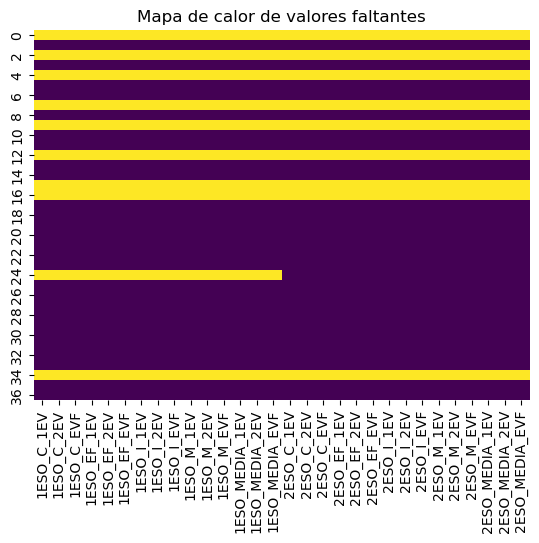

In [5]:
# Porcentaje de valores faltantes por columna
missing_percentage = dh_selected.isnull().mean() * 100
print("Porcentaje de valores faltantes por columna:\n", missing_percentage)

# Visualización de valores faltantes
sns.heatmap(dh_selected.isnull(), cbar=False, cmap='viridis')
plt.title("Mapa de calor de valores faltantes")
plt.show()

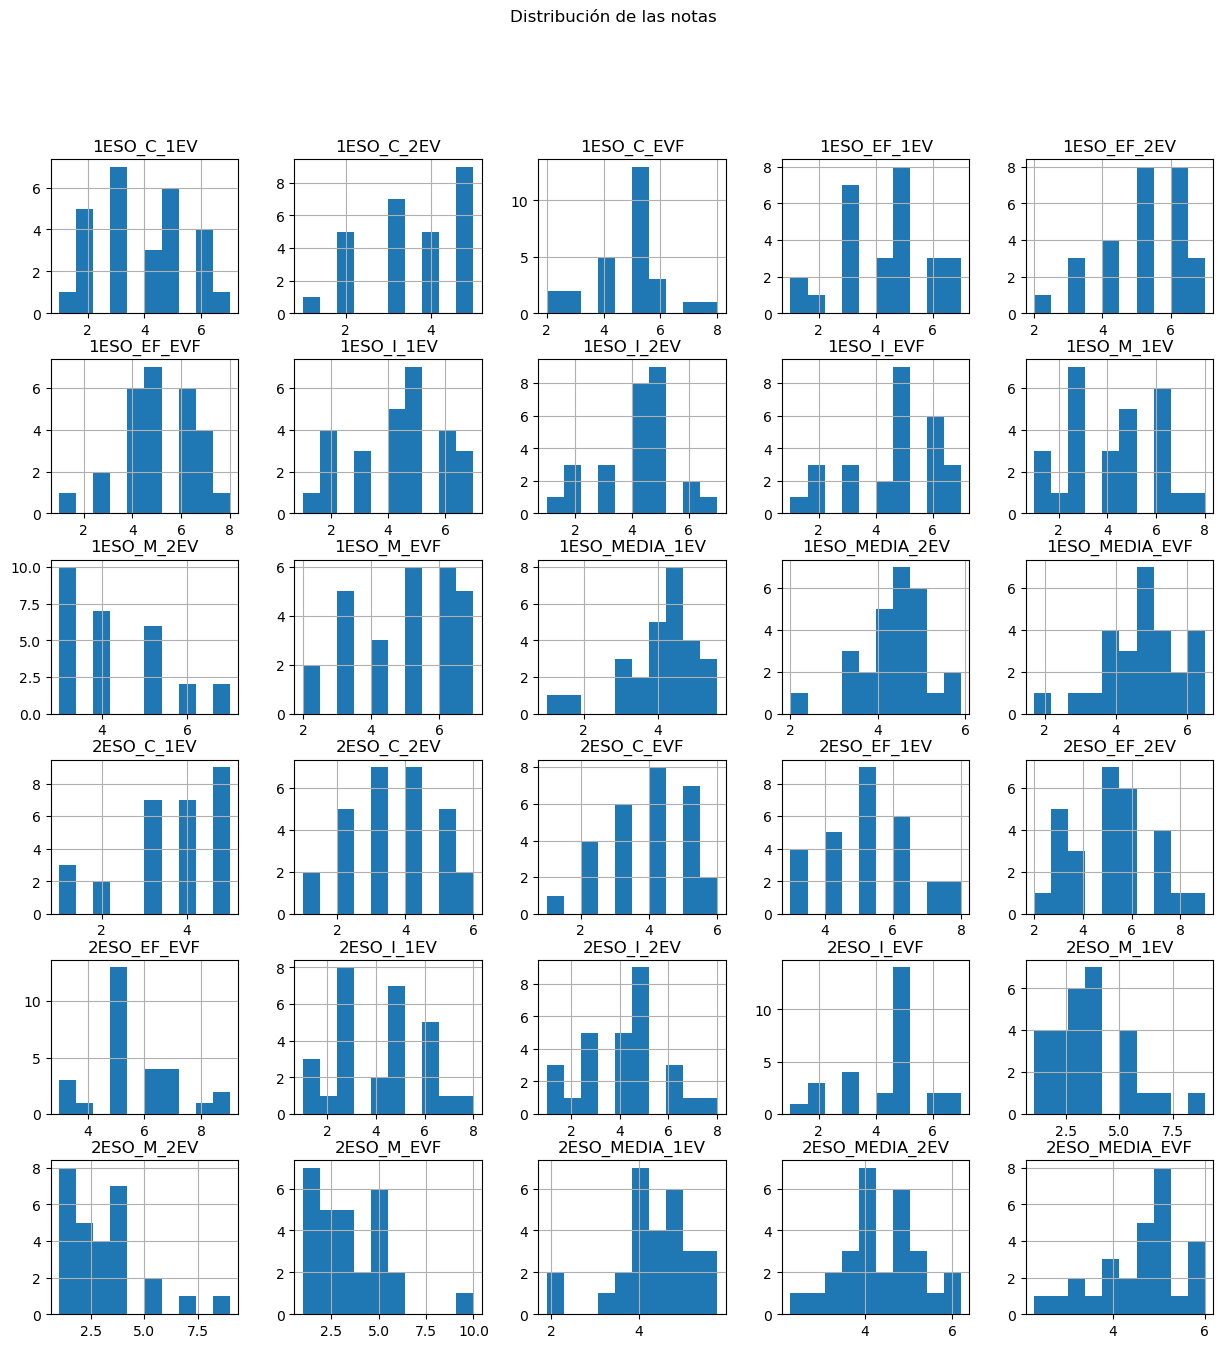

Descripción estadística:
        1ESO_C_1EV  1ESO_C_2EV  1ESO_C_EVF  1ESO_EF_1EV  1ESO_EF_2EV  \
count   27.000000   27.000000   27.000000    27.000000    27.000000   
mean     3.888889    3.592593    4.740741     4.296296     5.037037   
std      1.601282    1.248361    1.318291     1.682828     1.315046   
min      1.000000    1.000000    2.000000     1.000000     2.000000   
25%      3.000000    3.000000    4.000000     3.000000     4.000000   
50%      4.000000    4.000000    5.000000     5.000000     5.000000   
75%      5.000000    5.000000    5.000000     5.000000     6.000000   
max      7.000000    5.000000    8.000000     7.000000     7.000000   

       1ESO_EF_EVF  1ESO_I_1EV  1ESO_I_2EV  1ESO_I_EVF  1ESO_M_1EV  ...  \
count    27.000000   27.000000   27.000000   27.000000   27.000000  ...   
mean      5.111111    4.370370    4.148148    4.666667    4.222222  ...   
std       1.527525    1.690429    1.378508    1.664101    1.867399  ...   
min       1.000000    1.000000    

In [21]:
# Histograma de cada variable numérica
dh_selected.hist(bins=10, figsize=(15, 15))
plt.suptitle("Distribución de las notas")
plt.show()

# Descripción estadística
print("Descripción estadística:\n", dh_selected.describe())

Matriz de correlación:
                 1ESO_C_1EV  1ESO_C_2EV  1ESO_C_EVF  1ESO_EF_1EV  1ESO_EF_2EV  \
1ESO_C_1EV        1.000000    0.630664    0.477768     0.012687    -0.180620   
1ESO_C_2EV        0.630664    1.000000    0.657847    -0.160028     0.032974   
1ESO_C_EVF        0.477768    0.657847    1.000000     0.001284    -0.016434   
1ESO_EF_1EV       0.012687   -0.160028    0.001284     1.000000     0.585766   
1ESO_EF_2EV      -0.180620    0.032974   -0.016434     0.585766     1.000000   
1ESO_EF_EVF       0.131036    0.206179    0.377750     0.540306     0.648866   
1ESO_I_1EV        0.072624    0.220061    0.372669     0.270909    -0.023710   
1ESO_I_2EV        0.060016    0.215222    0.170099     0.262205    -0.045576   
1ESO_I_EVF        0.115470    0.172800    0.449992     0.146500    -0.082019   
1ESO_M_1EV        0.072887    0.056829    0.118044     0.480045     0.341085   
1ESO_M_2EV       -0.044813    0.060219    0.082945     0.186810     0.088347   
1ESO_M_EVF      

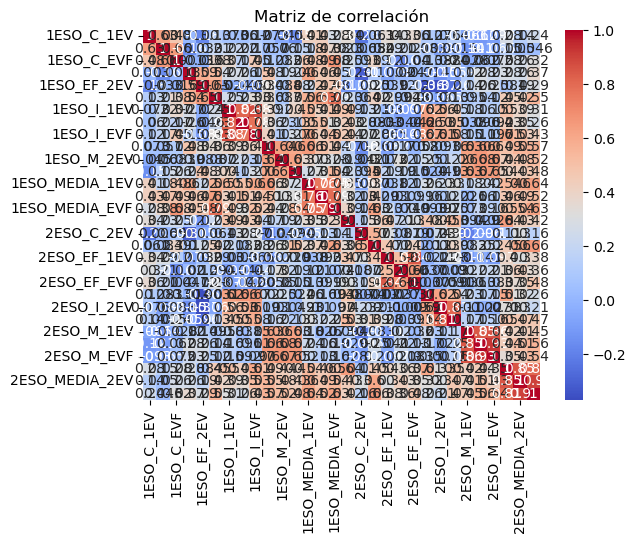

In [6]:
# Matriz de correlación de variables numéricas
correlation_matrix = dh_selected.corr()
print("Matriz de correlación:\n", correlation_matrix)

# Visualización de la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Matriz de correlación")
plt.show()

#Valores cercanos a 0 indican poca correlación. No parece haber una fuerte correlación de forma general.

Métodos de Imputación a utilizar:
    
`Imputación por la Media`

Cuándo usarla:

    -Los valores faltantes son pocos y los datos no tienen outliers significativos.

    -La distribución de los datos es aproximadamente normal (simétrica).

    -Se prefiere una solución simple y rápida.

Ventajas:

    -Fácil de implementar.

    -Conserva la media de los datos originales.

Desventajas:

    -Puede sesgar los resultados si los datos tienen outliers.

    -No preserva la varianza original de los datos.

`Imputación por la Mediana`

Cuándo usarla:

    -Los datos tienen outliers o una distribución asimétrica.

    -Los valores faltantes no son muchos.

Ventajas:

    -Menos afectada por outliers.

    -Preserva mejor la tendencia central en distribuciones asimétricas.

Desventajas:

    -No preserva la varianza original de los datos.

`Decisión:` Usar la media para los atributos que presenten una distribución cercana a la normal y mediana en el resto.

Para evaluar y decidir, usaremos la `Prueba Shapiro-Wilk`:

    -Es un test estadístico utilizado para verificar si un conjunto de datos sigue una distribución normal.

In [11]:
# Función para evaluar la normalidad y decidir el método de imputación
def evaluate_normality_and_impute(dh, columns):
    imputed_dh = dh.copy()
    for column in columns:
        # Eliminar valores NaN para la prueba de normalidad
        column_data = dh[column].dropna()
        
        # Realizar la prueba de Shapiro-Wilk
        stat, p_value = shapiro(column_data)
        
        # Umbral de significancia
        alpha = 0.05
        
        if p_value > alpha:
            print(f"{column}: Los datos parecen seguir una distribución normal (p = {p_value}). Imputando con la media.")
            imputer = SimpleImputer(strategy='mean')
        else:
            print(f"{column}: Los datos no parecen seguir una distribución normal (p = {p_value}). Imputando con la mediana.")
            imputer = SimpleImputer(strategy='median')
        
        # Imputar los valores faltantes
        imputed_dh[column] = imputer.fit_transform(dh[[column]])
    
    return imputed_dh

# Evaluar la normalidad y realizar la imputación
dh_imputed = evaluate_normality_and_impute(dh, columns_to_impute)

# Mostrar el DataFrame después de la imputación
print(dh_imputed)


1ESO_C_1EV: Los datos parecen seguir una distribución normal (p = 0.09898439319178981). Imputando con la media.
1ESO_C_2EV: Los datos no parecen seguir una distribución normal (p = 0.0035173217899042183). Imputando con la mediana.
1ESO_C_EVF: Los datos no parecen seguir una distribución normal (p = 0.018482460865795837). Imputando con la mediana.
1ESO_EF_1EV: Los datos parecen seguir una distribución normal (p = 0.10943350560398007). Imputando con la media.
1ESO_EF_2EV: Los datos parecen seguir una distribución normal (p = 0.052292599570535184). Imputando con la media.
1ESO_EF_EVF: Los datos parecen seguir una distribución normal (p = 0.20893219423877507). Imputando con la media.
1ESO_I_1EV: Los datos parecen seguir una distribución normal (p = 0.15439373952722213). Imputando con la media.
1ESO_I_2EV: Los datos parecen seguir una distribución normal (p = 0.10104870361496354). Imputando con la media.
1ESO_I_EVF: Los datos no parecen seguir una distribución normal (p = 0.0248141175436196

In [12]:
# Convertimos los tipos de datos de las columnas especificadas a Int64
for column in columns_to_impute:
    dh_imputed[column] = pd.to_numeric(dh_imputed[column], errors='coerce').round().astype('int64')

# Verificamos los tipos de datos para asegurarnos de que la conversión se realizó correctamente
print(dh_imputed.dtypes)


ID                  int64
1ESO_C_1EV          int64
1ESO_C_2EV          int64
1ESO_C_EVF          int64
1ESO_EF_1EV         int64
1ESO_EF_2EV         int64
1ESO_EF_EVF         int64
1ESO_I_1EV          int64
1ESO_I_2EV          int64
1ESO_I_EVF          int64
1ESO_M_1EV          int64
1ESO_M_2EV          int64
1ESO_M_EVF          int64
1ESO_MEDIA_1EV      int64
1ESO_MEDIA_2EV      int64
1ESO_MEDIA_EVF      int64
2ESO_C_1EV          int64
2ESO_C_2EV          int64
2ESO_C_EVF          int64
2ESO_EF_1EV         int64
2ESO_EF_2EV         int64
2ESO_EF_EVF         int64
2ESO_I_1EV          int64
2ESO_I_2EV          int64
2ESO_I_EVF          int64
2ESO_M_1EV          int64
2ESO_M_2EV          int64
2ESO_M_EVF          int64
2ESO_MEDIA_1EV      int64
2ESO_MEDIA_2EV      int64
2ESO_MEDIA_EVF      int64
1FPB_MEDIA_1EV    float64
1FPB_MEDIA_2EV    float64
1FPB_MEDIA_EVF    float64
1FPB_P_1EV        float64
1FPB_P_2EV        float64
1FPB_P_EVF        float64
1FPB_CA_1EV       float64
1FPB_CA_2EV 

# Unión de ambos datasets (socioeconómico y calificaciones) por ID

In [14]:
#Ahora vamos a unir los datos históricos con los socioeconómicos, a ver que cantidad de alumnos nos queda en la muestra.
df_unido = pd.merge(df, dh_imputed, on='ID', how='inner')

# Codificación de variables categóricas no ordinales con ONE HOT

In [15]:
#Realización de OneHotEncoder
encoder=ce.OneHotEncoder(cols=['A_PAIS', 'P_PAIS', 'M_PAIS', 'P_EDAD', 'M_EDAD', 'P_TRABAJO', 'M_TRABAJO', 'A_RESIDENCIA'],handle_unknown='return_nan',return_df=True,use_cat_names=True)
df_encoded = encoder.fit_transform(df_unido)

# Convertimos las columnas resultantes de OneHotEncoder de float a int
encoded_columns = df_encoded.columns.difference(df_unido.columns)

df_encoded[encoded_columns] = df_encoded[encoded_columns].astype('int64')

df_encoded.head()

,ID,A_FECHA_NAC,A_PAIS_MALI,A_PAIS_ESPAÑA,A_PAIS_COLOMBIA,A_PAIS_MARRUECOS,A_PAIS_ECUADOR,A_PAIS_CHINA,A_PAIS_RUMANIA,A_IDIOMA_NVL,...,1FPB_CS_1EV,1FPB_CS_2EV,1FPB_CS_EVF,REP_1ESO,REP_2ESO,REP_1FPB,REC_1EV,REC_2EV,REC_EVEX,PROMOCIONA
0,1,2006,1,0,0,0,0,0,0,1,...,6.0,5.0,5.0,0,0,0,2.0,0.0,1.0,0
1,2,2007,0,1,0,0,0,0,0,3,...,5.0,5.0,5.0,0,0,1,4.0,4.0,2.0,0
2,3,2008,0,0,1,0,0,0,0,3,...,6.0,5.0,6.0,0,0,0,0.0,0.0,1.0,1
3,4,2007,0,0,0,1,0,0,0,2,...,5.0,5.0,6.0,1,0,0,2.0,0.0,2.0,1
4,5,2008,0,0,0,1,0,0,0,2,...,6.0,7.0,8.0,0,0,0,0.0,0.0,0.0,1


In [16]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 0 to 30
Data columns (total 93 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     31 non-null     int64  
 1   A_FECHA_NAC            31 non-null     int64  
 2   A_PAIS_MALI            31 non-null     int64  
 3   A_PAIS_ESPAÑA          31 non-null     int64  
 4   A_PAIS_COLOMBIA        31 non-null     int64  
 5   A_PAIS_MARRUECOS       31 non-null     int64  
 6   A_PAIS_ECUADOR         31 non-null     int64  
 7   A_PAIS_CHINA           31 non-null     int64  
 8   A_PAIS_RUMANIA         31 non-null     int64  
 9   A_IDIOMA_NVL           31 non-null     int64  
 10  P_PAIS_OTRO_NO_EU      31 non-null     int64  
 11  P_PAIS_ESPAÑA          31 non-null     int64  
 12  P_PAIS_OTRO_EU         31 non-null     int64  
 13  M_PAIS_OTRO_NO_EU      31 non-null     int64  
 14  M_PAIS_ESPAÑA          31 non-null     int64  
 15  M_PAIS_O

# Guardado del nuevo dataset inputado, codificado y unido en csv como 'DATA_UNIDO_FINAL_INPUTADOH_ENCODED.csv'

In [17]:
# Guarda el DataFrame en un archivo CSV
archivo_csv = 'DATA_UNIDO_FINAL_INPUTADOH_ENCODED.csv'
df_encoded.to_csv(archivo_csv, index=False)